In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/AAPL_2006-01-01_to_2018-01-01.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [4]:
data = data[['Open']]
data.head()

,Open
0,10.34
1,10.73
2,10.69
3,10.75
4,10.96


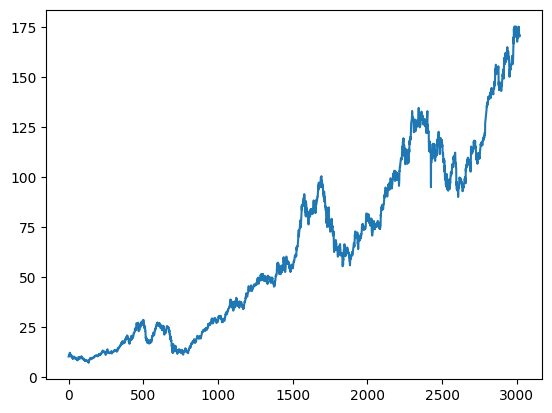

In [5]:
plt.plot(data['Open'])

In [6]:
X = data['Open'].values

In [7]:
X_train, X_test = X[:2500], X[2500:]

In [8]:
model = Sequential()
model.add(SimpleRNN(units=64, activation='tanh'))
model.add(Dense(1))

In [9]:
model.compile(loss='mean_absolute_error', optimizer='adam')

In [11]:
XT, yT = [], []
for i in range(len(X_train) - 30):
    d = i + 30
    XT.append(X_train[i:d,])
    yT.append(X_train[d])

In [13]:
Xt, yt = [], []
for i in range(len(X_test) - 30):
    d = i + 30
    Xt.append(X_test[i:d,])
    yt.append(X_test[d])

In [14]:
XT = np.array(XT)
Xt = np.array(Xt)

In [15]:
XT = np.reshape(XT, (XT.shape[0], XT.shape[1], 1))
Xt = np.reshape(Xt, (Xt.shape[0], Xt.shape[1], 1))

In [16]:
yT = np.array(yT)
yt = np.array(yt)

In [17]:
history = model.fit(XT, yT, epochs=100, batch_size=20)

Epoch 1/100

124/124 [==============================] - 3s 6ms/step - loss: 43.6663
Epoch 2/100
124/124 [==============================] - 1s 5ms/step - loss: 35.2529
Epoch 3/100
124/124 [==============================] - 1s 5ms/step - loss: 30.1467
Epoch 4/100
124/124 [==============================] - 1s 5ms/step - loss: 26.1949
Epoch 5/100
124/124 [==============================] - 1s 5ms/step - loss: 22.7201
Epoch 6/100
124/124 [==============================] - 1s 5ms/step - loss: 19.5134
Epoch 7/100
124/124 [==============================] - 1s 5ms/step - loss: 16.6744
Epoch 8/100
124/124 [==============================] - 1s 5ms/step - loss: 14.2673
Epoch 9/100
124/124 [==============================] - 1s 5ms/step - loss: 12.2190
Epoch 10/100
124/124 [==============================] - 1s 5ms/step - loss: 10.4875
Epoch 11/100
124/124 [==============================] - 1s 5ms/step - loss: 8.9835
Epoch 12/100
124/124 [==============================] - 1s 5ms/step - loss: 7.6854
Ep

In [21]:
model.evaluate(Xt, yt)

16/16 [==============================] - 0s 4ms/step - loss: 11.0254


11.025364875793457

: 

In [19]:
XTPredicted = model.predict(XT)
XtPredicted = model.predict(Xt)
XFinal = np.concatenate([XTPredicted, XtPredicted], axis=0)

16/16 [==============================] - 0s 3ms/step


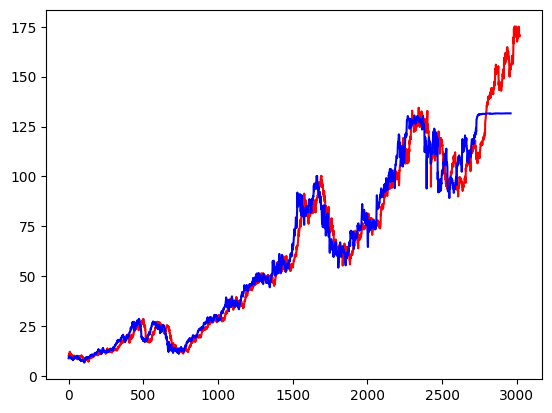

In [20]:
plt.plot(X, color='red')
plt.plot(XFinal, color='blue')